# <span style="color:darkblue">ABO Systematic Review - Characteristics</span> 

Author: Kiana Lee Martinez\
Date: 2023

# <span style="color:dodgerblue">Background Information</span>

This notebook documents how we will look at different characteristics including:
* populations
* year of publication
* journals


# <span style="color:dodgerblue">Import Packages</span>

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import glob # finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
import os # Miscellaneous operating system interfaces
import seaborn as sns # for data visualization 
from scipy import stats # for performing stats
import scipy.stats.distributions as dist # for performing stats
import matplotlib.pyplot as plt # for data vis
import matplotlib.patches as mpatches # for data vis

In [2]:
# set useful variables
directory = "../"

# <span style="color:dodgerblue">Read in datasets</span>

Read in merged raw data.

In [3]:
# read in csv file
df_raw = pd.read_csv(directory + "data/complete-raw-data.csv")


In [4]:
# print column names
for col in df_raw.columns:
    print(col)

refid
author
title
accession_num
database_provider
date
id
issue
journal
language
database_name
pages
publication
publisher
volume
year
user
level
snps
o_snps
b_snps
a_snps
a1_snps
a2_snps
snp_num
haplotype
sero
ld
ld_score
sig_result
cohort_total
pop_descrip
afr
amr
eas
eur
sas
other
pheno
study
seq
multi_b_snps
o2
subtypes
o_v_nono
diversity
imputed
notes


# <span style="color:dodgerblue">Update raw data with derived data</span>

## Population Descriptions

In [5]:
# read in population descriptions
df_pop_descriptions = pd.read_csv(directory + "data/population-descriptions.csv")
# simply dataset to have just refid and 1000g pop
df_pop = df_pop_descriptions[["refid", "1000g_population"]]

# add to raw data
df_raw_updated = pd.merge(df_raw, df_pop, on="refid")

## Sequencing/Genotyping Platforms

In [6]:
# read in sequencing/genotyping platform categorizations
df_seq_geno = pd.read_csv(directory + "data/seq-categorization.csv")
# simply dataset to have just refid and 1000g pop
df_seq_geno = df_seq_geno[["refid", "seq_categor"]]

# add to raw data
df_raw_updated = pd.merge(df_raw_updated, df_seq_geno, on="refid")

## Primary Phenotype Categories

In [7]:
# read in phenotype classification
df_pheno = pd.read_csv(directory + "data/phenotype_descriptions.csv")

# simply dataset to have just refid and phenotype_classification
df_pheno = df_pheno[["refid", "phenotype_classification"]]
# add to raw data
df_raw_updated = pd.merge(df_raw_updated, df_pheno, on="refid")

## Standardizing Journal Names

In [8]:
# read in phenotype classification
df_journals = pd.read_csv(directory + "data/journals_list.csv")
# add to raw data
df_raw_updated = pd.merge(df_raw_updated, df_journals, on="refid")

In [9]:
# rename dataframe for ease
df_raw = df_raw_updated

# <span style="color:dodgerblue">Export Dataset</span>

In [10]:
# select columsn of interest
df_updated = df_raw_updated[['refid', 'author', 'title', 'issue', 'Journal', 'pages', 'publisher', 'volume', 'year', 
                             'snps', 'o_snps', 'a_snps', 'b_snps', 'snp_num', 'haplotype', 'sero', 'ld', 'ld_score',
                             'sig_result', 'cohort_total', 'pop_descrip', 'afr', 'amr', 'eas', 'eur', 'sas', 'other', 
                             'pheno', 'study', 'seq', '1000g_population', 'seq_categor', 'phenotype_classification']]



# update column names
df_updated = df_updated.rename({'Journal': 'journal'}, 
                               axis=1)  

In [11]:
# save as CSV file
df_updated.to_csv(directory + "results/extracted_derived_data.csv", 
                 index=False)

# <span style="color:dodgerblue">Summaries</span>

## Population break down of studies

In [12]:
# counts
pop_counts = df_raw["1000g_population"].value_counts()

# percs
pop_percs = df_raw["1000g_population"].value_counts(normalize=True)

# table with both counts and percs
pd.concat([pop_counts,pop_percs], axis=1, keys=['count', 'percentage'])

,count,percentage
EUR,59,0.433824
EAS,30,0.220588
unclear,19,0.139706
AFR,7,0.051471
"AFR, EUR",6,0.044118
"EUR, other",4,0.029412
AMR,3,0.022059
"AFR, EUR, other",2,0.014706
"AFR, AMR, EUR, other",2,0.014706
"AFR, other",2,0.014706


The number/percent of studies done in more than one population. 

In [13]:
# count the number of rows when row contains a comma; index "True" from value.counts
multi_ancestry_count = df_raw["1000g_population"].str.contains(",").value_counts()[True]

# percent the number of rows when row contains a comma; index "True" from value.counts
multi_ancestry_perc = df_raw["1000g_population"].str.contains(",").value_counts(normalize=True)[True]

print(multi_ancestry_count,",",multi_ancestry_perc)

17 , 0.125


The number/percent of studies whose population break down was unclear. 

In [14]:
# count the number of rows when row contains a comma; index "True" from value.counts
unclear_ancestry_count = df_raw["1000g_population"].str.contains("unclear").value_counts()[True]

# percent the number of rows when row contains a comma; index "True" from value.counts
unclear_ancestry_perc = df_raw["1000g_population"].str.contains("unclear").value_counts(normalize=True)[True]

print(unclear_ancestry_count,",",unclear_ancestry_perc)

19 , 0.13970588235294118


The number/percent of studies who population was done in a single population. 

In [15]:
# count if single population; count if doesn't contain the following two strings
single_ancestry_count = df_raw["1000g_population"].str.contains(",|unclear").value_counts()[False] # note the "False"

# percent the number of rows when row contains a comma; index "True" from value.counts
single_ancestry_perc = df_raw["1000g_population"].str.contains(",|unclear").value_counts(normalize=True)[False] # note the "False"

print(single_ancestry_count,",",single_ancestry_perc)

100 , 0.7352941176470589


The number/percent of studies done in European population. 

In [16]:
# count if includes European populations
eur_ancestry_count = df_raw["1000g_population"].str.contains("EUR").value_counts()[True]

# percent the number of rows when row contains a comma; index "True" from value.counts
eur_ancestry_perc = df_raw["1000g_population"].str.contains("EUR").value_counts(normalize=True)[True] 

print(eur_ancestry_count,",",eur_ancestry_perc)

74 , 0.5441176470588235


## Publication years

### Mean and median year of publication

In [17]:
# mean
publication_mean = df_raw["year"].mean()

# median
publication_median = df_raw["year"].median()

print("The mean year of publication is", round(publication_mean), 
     "and the median year of publication is", round(publication_median)) 

The mean year of publication is 2016 and the median year of publication is 2016


### Distribution of years of publication

In [18]:
# counts within 1000g population breakdown
df_raw["year"].value_counts()

# convert value counts output to dataframe
years = df_raw["year"].value_counts().rename_axis('year').reset_index(name='count')

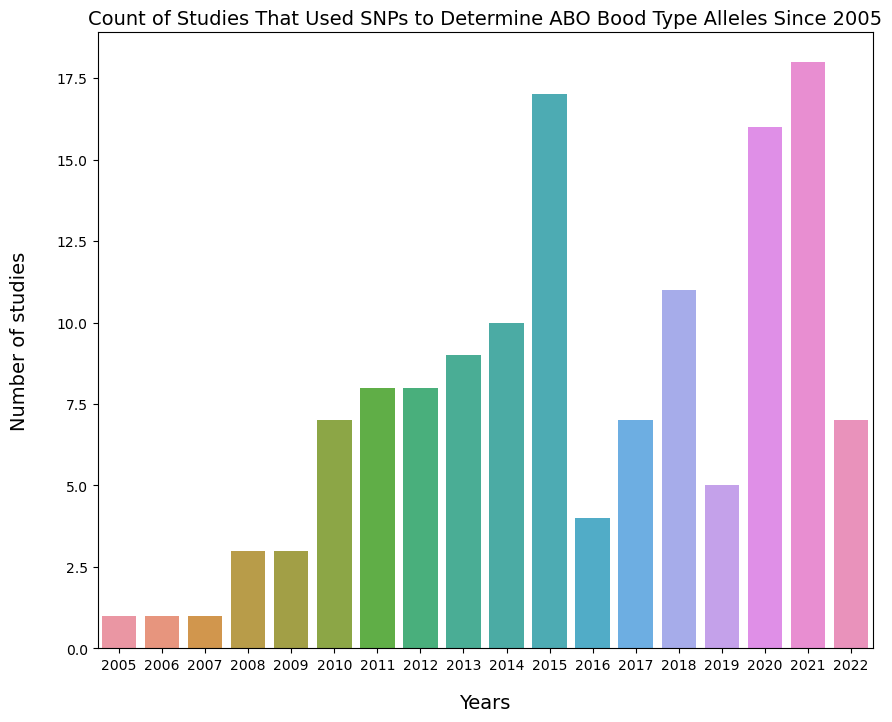

In [19]:
# bar plot

# set the figure size
plt.figure(figsize=(10, 8))

# count plot shows the counts of observations in each categorical bin using bars.
sns.countplot(data=df_raw, x="year")

# customize
plt.title('Count of Studies That Used SNPs to Determine ABO Bood Type Alleles Since 2005', fontsize=14)
plt.xlabel('Years', fontsize=14, labelpad=15)
plt.ylabel('Number of studies', fontsize=14, labelpad=20)

plt.show()

## List of journals

Some of the journal names aren't standardized so I made an updated list of the journal names for each publicaiton. 

In [20]:
# read in updated list of journals 
jls = pd.read_csv(directory + "data/journals_list.csv")

In [21]:
# add in new list to df
df_raw_jls = pd.merge(df_raw, jls, how='right', on='refid')

In [22]:
# counts within 1000g population breakdown
df_raw_jls["Journal_y"].value_counts()

# convert value counts output to dataframe
journals = df_raw_jls["Journal_y"].value_counts().rename_axis('journals').reset_index(name='count of studies')
journals.head(15)

,journals,count of studies
0,Journal of Thrombosis and Haemostasis,14
1,PLOS One,12
2,Human Molecular Genetics,6
3,Nature Genetics,5
4,Blood,5
5,International Journal of Cancer,4
6,"Cancer Epidemiology, Biomarkers & Prevention",4
7,Transfusion,3
8,Cancer Medicine,3
9,BMC Genomics,2


### Loops to count the number of times a population is evaluated

In [23]:
# for loop to count the number of times EUR is seen
eur_sum = 0
for i in df_raw["1000g_population"]:
    if 'EUR' in i :
        eur_sum += 1

# for loop to count the number of times AFR is seen
afr_sum = 0
for i in df_raw["1000g_population"]:
    if "AFR" in i :
        afr_sum += 1

# for loop to count the number of times AMR is seen
amr_sum = 0
for i in df_raw["1000g_population"]:
    if 'AMR' in i :
        amr_sum += 1

# for loop to count the number of times EAS is seen
eas_sum = 0
for i in df_raw["1000g_population"]:
    if 'EAS' in i :
        eas_sum += 1

# for loop to count the number of times SAS is seen
sas_sum = 0
for i in df_raw["1000g_population"]:
    if 'SAS' in i :
        sas_sum += 1
print(eur_sum, afr_sum, amr_sum, eas_sum, sas_sum)

74 20 5 31 1


In [24]:
# make a dataframe

# initialize a data of lists
populations = {'Population': ["EUR", "AFR", "AMR", "EAS", "SAS"],
              'Number_of_References': [eur_sum, afr_sum, amr_sum, eas_sum, sas_sum]}

# create dataframe
pop = pd.DataFrame(populations)

# add in proportions
pop['Proportion'] = (pop['Number_of_References'] / pop['Number_of_References'].sum())

pop

,Population,Number_of_References,Proportion
0,EUR,74,0.564885
1,AFR,20,0.152672
2,AMR,5,0.038168
3,EAS,31,0.236641
4,SAS,1,0.007634


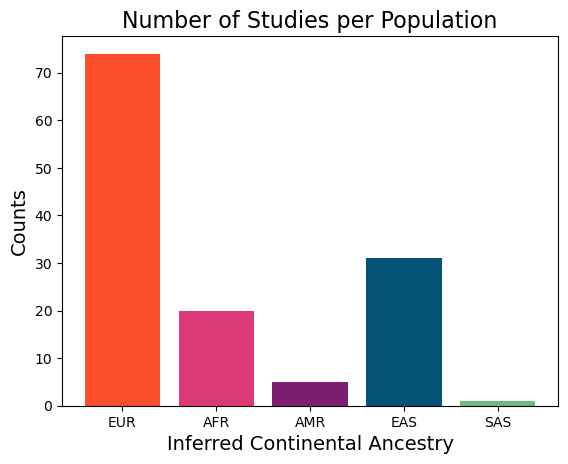

In [26]:
# create a bargraph

# assign
barplot_fig = plt.gcf()

# import package
import matplotlib.pyplot as plt
# create graph with matplotlib
New_Colors = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']
plt.bar(pop['Population'], pop['Number_of_References'], color=New_Colors)
plt.title('Number of Studies per Population', fontsize=16)
plt.xlabel('Inferred Continental Ancestry', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

# save figure
barplot_fig.savefig(f"{directory}results/python_figures/number-studies-per-population.svg", 
           format='svg',
           bbox_inches="tight")

# <span style="color:dodgerblue">Haplotype Analysis</span>

First, we need to ask if phasing the data is warranted. Is the study looking at both O and A/B blood type alleles?

In [27]:
# subset to  keep only the references that look at both O and AB blood type allles
df_hap = df_raw.loc[(df_raw['o_snps'].notna()) & 
                    (df_raw['b_snps'].notna())]

# now pull only the oclumns we want
df_hap = df_raw[["refid", "haplotype"]]
# rename columns
df_hap.columns = ["refid", "haplotype_analysis"]
df_hap

,refid,haplotype_analysis
0,22,Unclear
1,44,Yes
2,49,Yes
3,53,No
4,325,Yes
...,...,...
131,1912,Unclear
132,1926,No
133,1963,Unclear
134,1967,No


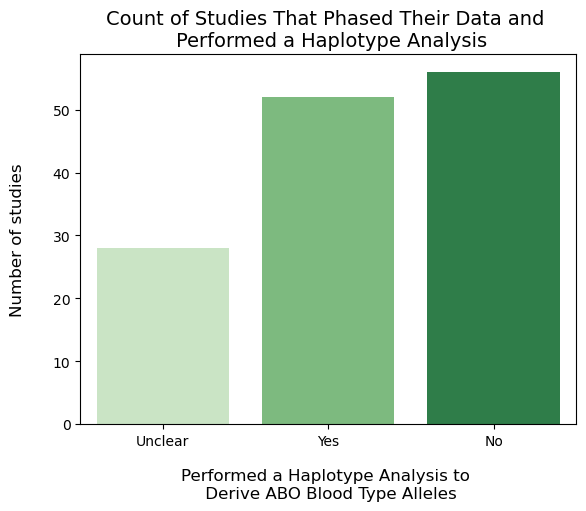

In [28]:
# bar plot

# assign
hap_fig = plt.gcf()

# set the figure size
#plt.figure(figsize=(10, 8))

# create a custom color palette
sns.set_palette("Greens", 3)

# count plot shows the counts of observations in each categorical bin using bars.
sns.countplot(data=df_hap, x="haplotype_analysis")

# customize
plt.title('Count of Studies That Phased Their Data and \n Performed a Haplotype Analysis', fontsize=14)
plt.xlabel('Performed a Haplotype Analysis to \n Derive ABO Blood Type Alleles', fontsize=12, labelpad=15)
plt.ylabel('Number of studies', fontsize=12, labelpad=20)

plt.show()

# save figure
hap_fig.savefig(f"{directory}results/python_figures/haplotype-bar-plot.svg", 
           format='svg',
           bbox_inches="tight")

# <span style="color:dodgerblue">Phenotype Categorization Chart</span>

Using categorization created by Uju. 

The categorization are the following: 
    
* cardiovascular
* digestive system / gastrointestinal
* hematological
* hepatic
* immune system
* metabolic
* infectious disease
* inflammatory
* neurological
* oncology
* multiple phenotypes
* misc

In [29]:
# subset dataset for ease
df_pheno = df_raw[['refid', 'pheno', 'phenotype_classification']]
df_pheno.head()

,refid,pheno,phenotype_classification
0,22,coagulation factor VIII,hematological
1,44,COVID-19,infectious_disease
2,49,stroke risk,cardiovascular
3,53,autoimmune neutropenia of early childhood,immune_system
4,325,coagulation factor VIII,hematological


## Make a piechart

In [30]:
# count unique occurrences of values in a colum
df_pheno['phenotype_classification'].value_counts()

hematological                         28
cardiovascular                        28
oncology                              21
infectious_disease                    14
digestive_system_gastrointestinal      9
inflammatory                           8
misc                                   7
multiple_phenotypes                    6
immune_system                          5
hepatic                                5
neurological                           3
metabolic                              2
Name: phenotype_classification, dtype: int64

In [31]:
df_pheno['phenotype_classification'].value_counts(normalize=True).mul(100).round(2)

hematological                         20.59
cardiovascular                        20.59
oncology                              15.44
infectious_disease                    10.29
digestive_system_gastrointestinal      6.62
inflammatory                           5.88
misc                                   5.15
multiple_phenotypes                    4.41
immune_system                          3.68
hepatic                                3.68
neurological                           2.21
metabolic                              1.47
Name: phenotype_classification, dtype: float64

In [32]:
# convert ".value_counts" output to dataframe
df_pheno_pie = df_pheno.phenotype_classification.value_counts().rename_axis('phenotype_classification').reset_index(name='counts')
df_pheno_pie['phenotype_classification'].astype(str)
# calculate percentage 
percentage = df_pheno['phenotype_classification'].value_counts(normalize=True).mul(100).round(2).rename_axis('phenotype_classification').reset_index(name='percentage')
# merge the two dataframes
df_pheno_pie = pd.merge(df_pheno_pie, percentage, on='phenotype_classification')
df_pheno_pie

,phenotype_classification,counts,percentage
0,hematological,28,20.59
1,cardiovascular,28,20.59
2,oncology,21,15.44
3,infectious_disease,14,10.29
4,digestive_system_gastrointestinal,9,6.62
5,inflammatory,8,5.88
6,misc,7,5.15
7,multiple_phenotypes,6,4.41
8,immune_system,5,3.68
9,hepatic,5,3.68


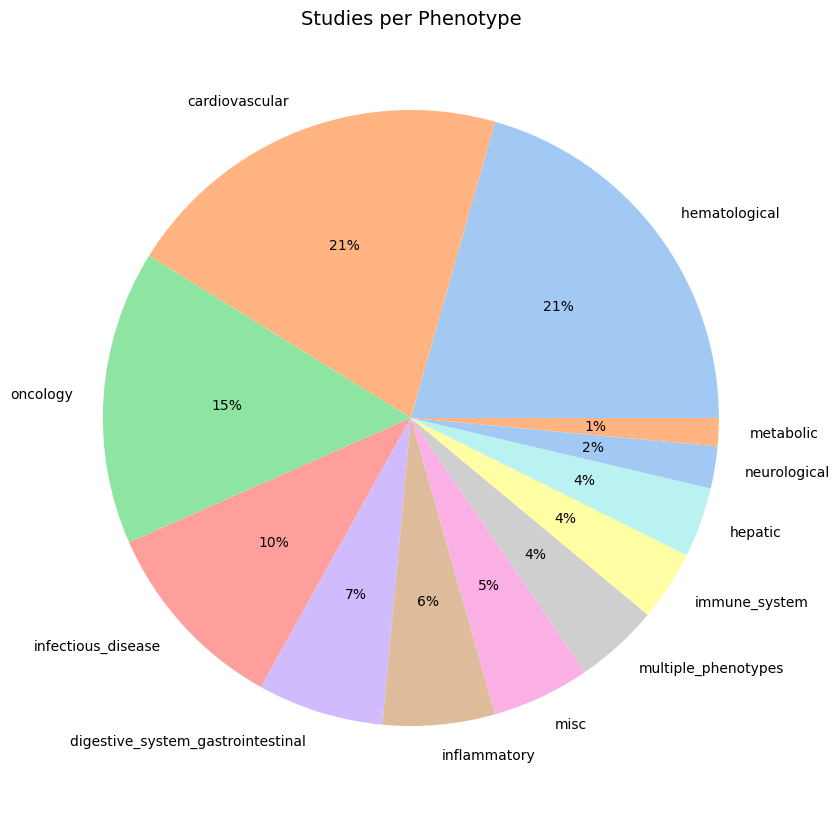

In [33]:
# set the figure size
plt.figure(figsize=(10, 10))

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(df_pheno_pie.counts, labels = df_pheno_pie['phenotype_classification'], colors = colors, autopct='%.0f%%')

plt.title('Studies per Phenotype', fontsize=14)

plt.show()


<Figure size 640x480 with 0 Axes>

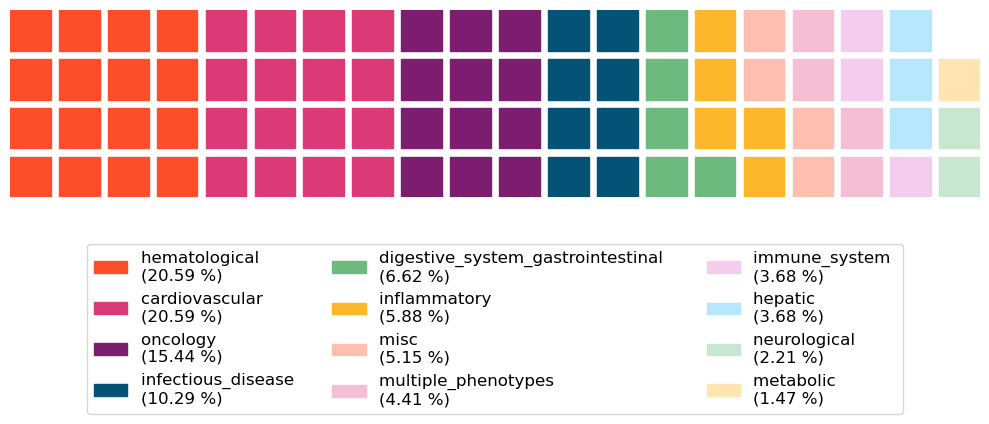

In [34]:
### waffle chart
from pywaffle import Waffle

#define Seaborn color palette to use
#colors = sns.color_palette('pastel')
colors = ['#FC4E2A', '#DC3977', '#7C1D6F', '#045275', '#6CBA7D', '#fcb72a',
          '#febfb1', '#f4bed3', '#f3ccee', '#b6e7fd', '#c9e6d0', '#fee5b1']

# set u plot labels
plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(df_pheno_pie.phenotype_classification, 
                                                    df_pheno_pie.percentage)]
# assign
pie_fig = plt.gcf()

pie_fig = plt.figure(FigureClass=Waffle, figsize=(10,10), rows=4, columns = 20, 
                 values=list(df_pheno_pie['percentage']),
                 colors=colors,
                 labels=plot_labels,
                 legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -1.2), 
                        'ncol':3, 'fontsize':12})

# save figure
pie_fig.savefig(f"{directory}results/python_figures/studies-per-phenotype.svg", 
           format='svg',
           bbox_inches="tight")

# <span style="color:dodgerblue">Summary Table</span>

The characteristics I want to summarize across is population category (AFR, AMR, EAS, EUR, SAS, multiple, unclear) include:
* total studies
* total participants
* mean year of study
* sequencing/genotyping platform
    * sequencing
    * genotyping
    * PCR/specific target
    * multiple
* performed haplotype analysis
    * yes
    * no
    * unclear


## Population Categorization

Add a new column differentiating if the study is composed of one of the population groups:
* AFR
* AMR
* EAS
* EUR
* SAS
* Multiple
* Unclear

In [35]:
# create a list of conditions
conditions = [
    df_raw["1000g_population"] == 'AFR', 
    df_raw["1000g_population"] == 'AMR',
    df_raw["1000g_population"] == 'EAS',
    df_raw["1000g_population"] == 'EUR',
    df_raw["1000g_population"] == 'SAS',
    df_raw["1000g_population"] == 'unclear',
    df_raw["1000g_population"].str.contains(",") # value contains comma
]

# create a list of values that correspond to the conditions
values = [
    'AFR',
    'AMR',
    'EAS',
    'EUR',
    'SAS',
    'unclear',
    'multiple'
    
]

# create a new column
df_raw["population_category"] = np.select(conditions, values, default = "error")

In [37]:
df_raw["population_category"].unique()

array(['multiple', 'EUR', 'unclear', 'AFR', 'EAS', 'SAS', 'AMR'],
      dtype=object)

## Updated Sequencing Categorization

Add a new column differentiating an updated sequencing categorization:
* sequencing
* genotyping
* PCR/specific target
* multiple

In [41]:
# create a list of conditions
conditions = [
    df_raw["seq_categor"] == 'sequencing', 
    df_raw["seq_categor"] == 'snp_abg',
    df_raw["seq_categor"] == 'pcr_specific_target',
    df_raw["seq_categor"].str.contains(",") # value contains comma
]

# create a list of values that correspond to the conditions
values = [
    'sequencing',
    'genotyping',
    'pcr_specific_target',
    'multiple'
    
]

# create a new column
df_raw["updated_seq_categor"] = np.select(conditions, values, default = "error")


## Populate New Tables

### Sequencing/Genotyping Categories

In [44]:
df_raw['population_category'].unique()

array(['multiple', 'EUR', 'unclear', 'AFR', 'EAS', 'SAS', 'AMR'],
      dtype=object)

In [46]:
# subset out by population category
afr_df = df_raw.loc[df_raw['population_category'] == 'AFR']
amr_df = df_raw.loc[df_raw['population_category'] == 'AMR']
eas_df = df_raw.loc[df_raw['population_category'] == 'EAS']
eur_df = df_raw.loc[df_raw['population_category'] == 'EUR']
sas_df = df_raw.loc[df_raw['population_category'] == 'SAS']
mult_df = df_raw.loc[df_raw['population_category'] == 'multiple']
unclear_df = df_raw.loc[df_raw['population_category'] == 'unclear']

In [47]:
# make population category subsets

# empty dataframe
summary_df = pd.DataFrame()

# define lists
anc_list = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'multiple', 'unclear']
anc_df = [afr_df, amr_df, eas_df, eur_df, sas_df, mult_df, unclear_df]
seq_list = ['sequencing', 'genotyping', 'pcr_specific_target', 'multiple']


# loop to create stratified dataframes
for x, y in zip(anc_df, anc_list):
    x = df_raw.loc[df_raw['population_category'] == f'{y}']
    for z in seq_list:
        mask = x['updated_seq_categor'] == f'{z}'
        count = len(x[mask])
        summary_df.loc[f'{z}', f'{y}'] = count

summary_df.head()

,AFR,AMR,EAS,EUR,SAS,multiple,unclear
sequencing,2.0,0.0,0.0,1.0,0.0,0.0,2.0
genotyping,4.0,0.0,12.0,36.0,1.0,10.0,9.0
pcr_specific_target,1.0,3.0,14.0,17.0,0.0,5.0,6.0
multiple,0.0,0.0,4.0,5.0,0.0,2.0,2.0


In [49]:
# make population category subsets

# empty dataframe
summary_df = pd.DataFrame()

# define lists
anc_list = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'multiple', 'unclear']
anc_df = [afr_df, amr_df, eas_df, eur_df, sas_df, mult_df, unclear_df]
seq_list = ['sequencing', 'genotyping', 'pcr_specific_target', 'multiple']
hap_list = ['Yes', 'No', 'Unclear']


# loop to create stratified dataframes
for x, y in zip(anc_df, anc_list):
    x = df_raw.loc[df_raw['population_category'] == f'{y}']
    for z in seq_list:
        mask = x['updated_seq_categor'] == f'{z}'
        count = len(x[mask])
        summary_df.loc[f'{z}', f'{y}'] = count
    for w in hap_list:
        mask = x['haplotype'] == f'{w}'
        count = len(x[mask])
        summary_df.loc[f'haplotype_{w}', f'{y}'] = count

summary_df.head(10)

,AFR,AMR,EAS,EUR,SAS,multiple,unclear
sequencing,2.0,0.0,0.0,1.0,0.0,0.0,2.0
genotyping,4.0,0.0,12.0,36.0,1.0,10.0,9.0
pcr_specific_target,1.0,3.0,14.0,17.0,0.0,5.0,6.0
multiple,0.0,0.0,4.0,5.0,0.0,2.0,2.0
haplotype_Yes,4.0,1.0,5.0,27.0,1.0,10.0,4.0
haplotype_No,2.0,2.0,19.0,21.0,0.0,3.0,9.0
haplotype_Unclear,1.0,0.0,6.0,11.0,0.0,4.0,6.0


In [50]:
# make population category subsets

# empty dataframe
summary_df = pd.DataFrame()

# define lists
anc_list = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'multiple', 'unclear']
anc_df = [afr_df, amr_df, eas_df, eur_df, sas_df, mult_df, unclear_df]
seq_list = ['sequencing', 'genotyping', 'pcr_specific_target', 'multiple']
hap_list = ['Yes', 'No', 'Unclear']


# loop to create stratified dataframes
for x, y in zip(anc_df, anc_list):
    x = df_raw.loc[df_raw['population_category'] == f'{y}']
    summary_df.loc[f'total_studies', f'{y}'] = len(x) # total studies n
    summary_df.loc[f'year_mean', f'{y}'] = round(x['year'].mean()) # mean year
    for z in seq_list: # fill in based on sequecing platform
        mask = x['updated_seq_categor'] == f'{z}'
        count = len(x[mask])
        summary_df.loc[f'{z}', f'{y}'] = count
    for w in hap_list: # fill in based on type of haplotype analysis
        mask = x['haplotype'] == f'{w}'
        count = len(x[mask])
        summary_df.loc[f'haplotype_{w}', f'{y}'] = count
    

summary_df.head(10)

,AFR,AMR,EAS,EUR,SAS,multiple,unclear
total_studies,7.0,3.0,30.0,59.0,1.0,17.0,19.0
year_mean,2015.0,2015.0,2016.0,2016.0,2021.0,2016.0,2017.0
sequencing,2.0,0.0,0.0,1.0,0.0,0.0,2.0
genotyping,4.0,0.0,12.0,36.0,1.0,10.0,9.0
pcr_specific_target,1.0,3.0,14.0,17.0,0.0,5.0,6.0
multiple,0.0,0.0,4.0,5.0,0.0,2.0,2.0
haplotype_Yes,4.0,1.0,5.0,27.0,1.0,10.0,4.0
haplotype_No,2.0,2.0,19.0,21.0,0.0,3.0,9.0
haplotype_Unclear,1.0,0.0,6.0,11.0,0.0,4.0,6.0


In [51]:
# make population category subsets

# empty dataframe
summary_df = pd.DataFrame()

# define lists
anc_list = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'multiple', 'unclear']
anc_df = [afr_df, amr_df, eas_df, eur_df, sas_df, mult_df, unclear_df]
seq_list = ['sequencing', 'genotyping', 'pcr_specific_target', 'multiple']
hap_list = ['Yes', 'No', 'Unclear']


# loop to create stratified dataframes
for x, y in zip(anc_df, anc_list):
    x = df_raw.loc[df_raw['population_category'] == f'{y}']
    summary_df.loc[f'total_studies', f'{y}'] = len(x) # total studies n
    summary_df.loc[f'year_mean', f'{y}'] = round(x['year'].mean()) # mean year
    for z in seq_list: # fill in based on sequecing platform
        mask = x['updated_seq_categor'] == f'{z}'
        count = len(x[mask])
        summary_df.loc[f'{z}', f'{y}'] = count
    for w in hap_list: # fill in based on type of haplotype analysis
        mask = x['haplotype'] == f'{w}'
        count = len(x[mask])
        summary_df.loc[f'haplotype_{w}', f'{y}'] = count
    

summary_df.head(10)

,AFR,AMR,EAS,EUR,SAS,multiple,unclear
total_studies,7.0,3.0,30.0,59.0,1.0,17.0,19.0
year_mean,2015.0,2015.0,2016.0,2016.0,2021.0,2016.0,2017.0
sequencing,2.0,0.0,0.0,1.0,0.0,0.0,2.0
genotyping,4.0,0.0,12.0,36.0,1.0,10.0,9.0
pcr_specific_target,1.0,3.0,14.0,17.0,0.0,5.0,6.0
multiple,0.0,0.0,4.0,5.0,0.0,2.0,2.0
haplotype_Yes,4.0,1.0,5.0,27.0,1.0,10.0,4.0
haplotype_No,2.0,2.0,19.0,21.0,0.0,3.0,9.0
haplotype_Unclear,1.0,0.0,6.0,11.0,0.0,4.0,6.0


Decided not to add the column of "total participants" because there not every study had a clear number of participants. 

In [52]:
# afr
summary_df.loc[f'total_participants', 'AFR'] = afr_df['cohort_total'].astype(str).astype(int).sum()
# amr
summary_df.loc[f'total_participants', 'AMR'] = amr_df['cohort_total'].astype(str).astype(int).sum()
# eas
eas_df = eas_df[eas_df['cohort_total'] != 'unclear'] # remove unclear
summary_df.loc[f'total_participants', 'EAS'] = eas_df['cohort_total'].astype(str).astype(int).sum()
# eur
summary_df.loc[f'total_participants', 'EUR'] = eur_df['cohort_total'].astype(str).astype(int).sum()
# sas
summary_df.loc[f'total_participants', 'SAS'] = sas_df['cohort_total'].astype(str).astype(int).sum()
# multiple
summary_df.loc[f'total_participants', 'multiple'] = mult_df['cohort_total'].astype(str).astype(int).sum()
# unclear
unclear_df_updated = unclear_df[df_raw['cohort_total'] != 'unclear']
unclear_df_updated['cohort_total'] = unclear_df_updated["cohort_total"].str.replace("~", "")
unclear_df = unclear_df_updated.copy()
summary_df.loc[f'total_participants', 'unclear'] = unclear_df_updated['cohort_total'].astype(str).astype(int).sum()
#unclear_df.head(1)

summary_df

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_7792\2510963085.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unclear_df_updated = unclear_df[df_raw['cohort_total'] != 'unclear']
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_7792\2510963085.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unclear_df_updated['cohort_total'] = unclear_df_updated["cohort_total"].str.replace("~", "")


,AFR,AMR,EAS,EUR,SAS,multiple,unclear
total_studies,7.0,3.0,30.0,59.0,1.0,17.0,19.0
year_mean,2015.0,2015.0,2016.0,2016.0,2021.0,2016.0,2017.0
sequencing,2.0,0.0,0.0,1.0,0.0,0.0,2.0
genotyping,4.0,0.0,12.0,36.0,1.0,10.0,9.0
pcr_specific_target,1.0,3.0,14.0,17.0,0.0,5.0,6.0
multiple,0.0,0.0,4.0,5.0,0.0,2.0,2.0
haplotype_Yes,4.0,1.0,5.0,27.0,1.0,10.0,4.0
haplotype_No,2.0,2.0,19.0,21.0,0.0,3.0,9.0
haplotype_Unclear,1.0,0.0,6.0,11.0,0.0,4.0,6.0
total_participants,11096.0,2173.0,215613.0,1139015.0,646.0,1643744.0,1089870.0


Proportion

In [53]:
# make population category subsets

# empty dataframe
summary_df = pd.DataFrame()

# define lists
anc_list = ['AFR_%', 'AMR_%', 'EAS_%', 'EUR_%', 'SAS_%', 'multiple_%', 'unclear_%']
anc_df = [afr_df, amr_df, eas_df, eur_df, sas_df, mult_df, unclear_df]
seq_list = ['sequencing', 'genotyping', 'pcr_specific_target', 'multiple']
hap_list = ['Yes', 'No', 'Unclear']


# loop to create stratified dataframes
for x, y in zip(anc_df, anc_list):
    x = df_raw.loc[df_raw['population_category'] == f'{y}']
    
# loop too fill in dataframe
for x, y in zip(anc_df, anc_list):
    summary_df.loc[f'total_studies', f'{y}'] = 'NA'
    summary_df.loc[f'year_mean', f'{y}'] = 'NA' # mean year
    for z in seq_list: # fill in based on sequecing platform
        mask = x['updated_seq_categor'] == f'{z}'
        count = len(x[mask])
        summary_df.loc[f'{z}', f'{y}'] = round((count/(len(x))) * 100, 1)
    for w in hap_list: # fill in based on type of haplotype analysis
        mask = x['haplotype'] == f'{w}'
        count = len(x[mask])
        summary_df.loc[f'haplotype_{w}', f'{y}'] = round((count/len(x)) * 100, 1)
    

summary_df.head(10)

,AFR_%,AMR_%,EAS_%,EUR_%,SAS_%,multiple_%,unclear_%
total_studies,NA,NA,NA,NA,NA,NA,NA
year_mean,NA,NA,NA,NA,NA,NA,NA
sequencing,28.6,0.0,0.0,1.7,0.0,0.0,18.2
genotyping,57.1,0.0,41.4,61.0,100.0,58.8,54.5
pcr_specific_target,14.3,100.0,44.8,28.8,0.0,29.4,9.1
multiple,0.0,0.0,13.8,8.5,0.0,11.8,18.2
haplotype_Yes,57.1,33.3,17.2,45.8,100.0,58.8,18.2
haplotype_No,28.6,66.7,62.1,35.6,0.0,17.6,45.5
haplotype_Unclear,14.3,0.0,20.7,18.6,0.0,23.5,36.4
